In [1]:
import numpy as np
import numba as nb
import os
import matplotlib.pyplot as plt
import spline_gstar
import Num_SH_fast
import Emma3
import newQCDtransition as nw
import gstar_gstars as g
import importlib

import Emma3
import Emma3


### Create $g_*$ values

In [2]:
mixing = 5.33e-10
L0 = 0.0012

In [3]:
m_e = 0.511
m_mu = 105.7
m_tau = 1777
ve = 0
vmu = 0
vtau = 0
proton = 938.272
neutron = 939.565

#bosons
pion_pm = 139.57039
pion_0 = 134.9768
kaon_pm = 493.677
kaon_0 = 497.613
eta = 547.862
eta_p = 957.78
rho_pm = 775.11
rho_0 = 775.26

fermions = np.array([[ve, 2], [vmu, 2], [vtau, 2], [m_e, 4], [m_mu, 4], [m_tau, 4], [proton, 4], [neutron, 4] ])
bosons = np.array([[0,2], [pion_pm, 2], [pion_0, 1], [kaon_pm, 2], [kaon_0, 2] , [eta, 1] , [eta_p, 1] , [rho_pm, 6], [rho_0, 3]])

#create gstar_vals (load from .py file)
T = np.loadtxt("SMgstar.dat", usecols = 0, unpack = True)
gstar_old = np.loadtxt("SMgstar.dat", usecols = 1, unpack = True)
gstar_vals = np.zeros(len(T))
for i in range(len(T)):
    gstar_vals[i] = g.gstar(T[i], fermions, bosons)

#create gstarS_vals
gstarS_old = np.loadtxt("SMgstar.dat", usecols = 2, unpack = True)
gstarS_vals = np.zeros(len(T))
for i in range(len(T)):
    gstarS_vals[i] = g.gstarS(T[i], fermions, bosons)

### Create RDoF and reload

In [4]:
spline_gstar.save_spline_params(T, gstar_vals, gstarS_vals, npz_file_name = "Relativistic_Degrees_of_Freedom.npz")

In [5]:
importlib.reload(Num_SH_fast)
importlib.reload(Emma3)

import Emma3
import Emma3


<module 'Emma3' from '/Users/emmahorner/new_QCD/Emma3.py'>

### Diff QCD transitions

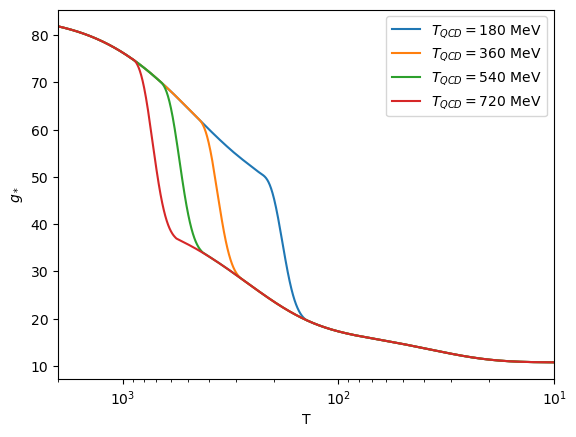

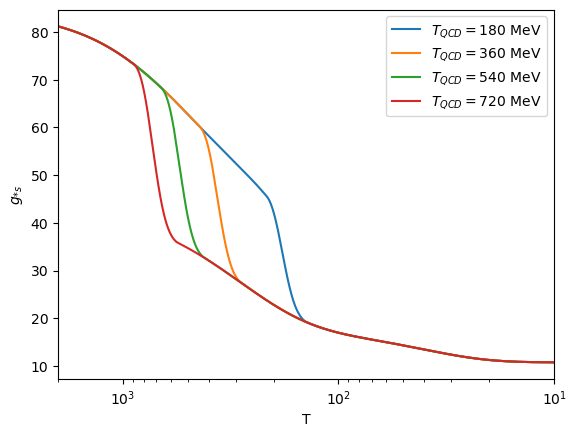

In [6]:
nw.example_plot()

### Spectra

In [7]:
Emma3.sterile_production(1000, 0.0071, mixing, mixing, mixing, L0, L0, L0, make_plot=False, folder_name="3to1 model", file_prefix="final3to1")

0.0965693677015745

In [8]:
data = np.load('3to1 model/final3to1x1.20e-03x1.60e-09.npz') 

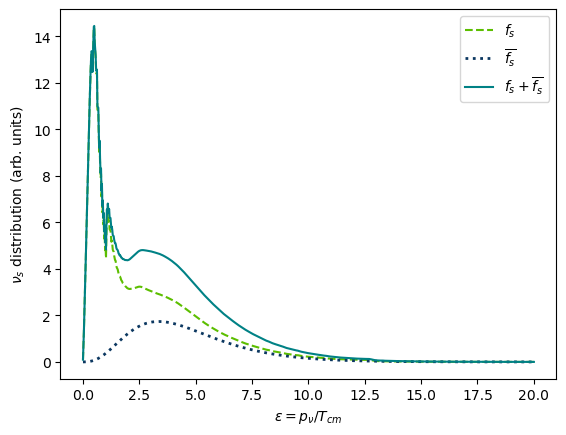

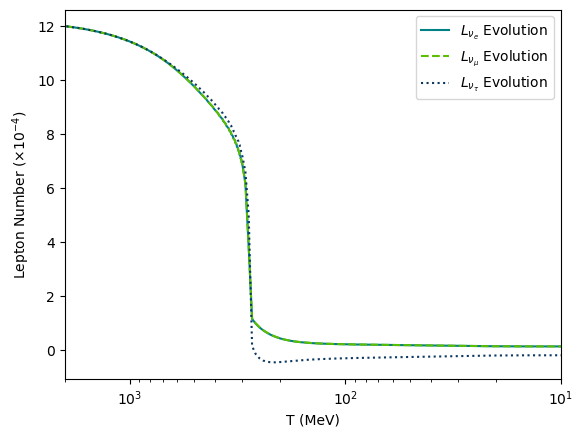

In [9]:
plt.figure()
plt.plot(data['epsilon'],data['epsilon']**2 * data['sterile_evo'][-1]*2000, linestyle = '--', color = '#5CBE00')
plt.plot(data['epsilon'],data['epsilon']**2 * data['anti_sterile_evo'][-1]*2000, linestyle = ':', linewidth=2, color = '#0B3760')
plt.plot(data['epsilon'],data['epsilon']**2 * data['final_distribution']*2000, color = '#008185')

plt.legend(['$f_{s}$', '$\overline{f_{s}}$', '$f_{s} +\overline{f_{s}}$ '], fontsize=10)

plt.xlabel(r"$\epsilon = p_\nu / T_{cm}$", fontsize=10)
plt.ylabel(r"$\nu_s$ distribution (arb. units)", fontsize=10)
plt.savefig("3to1-Spectra.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = '3to1-Spectra.png'
plt.savefig(image_name, format=image_format, dpi=1200)


plt.figure()
plt.semilogx(data['T'], 10**4*data['lep_evo_e'], color = '#008185')
plt.semilogx(data['T'], 10**4*data['lep_evo_mu'], linestyle = '--', color = '#5CBE00')
plt.semilogx(data['T'], 10**4*data['lep_evo_tau'], linestyle = ':', color = '#0B3760')
plt.legend([r'$L_{\nu_e}$ Evolution', r'$L_{\nu_{\mu}}$ Evolution', r'$L_{\nu_{\tau}}$ Evolution'], fontsize=10)
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
plt.savefig("3to1-LepEvo.pdf")
image_format = 'png' # e.g .png, .svg, etc.
image_name = '3to1-LepEvo.png'
plt.savefig(image_name, format=image_format, dpi=1200)